In [1]:
#plot dephasing N = 3

In [314]:
import numpy as np
import sys
sys.path.insert(1,'../')

import matplotlib.pyplot as plt
import matplotlib as mpl

In [232]:
import csv
from numpy import *
f2 = open('../../experiments/star_ansatz/time-dephasing_N3.csv', 'r') 
lines = f2.readlines()

noise, cost, cls, sld, traceoff = [], [], [], [], []

for line in lines:
    p = line.split()
    noise.append(float(p[0]))
    cost.append(float(p[1]))
    cls.append(float(p[2]))
    sld.append(float(p[3]))
    traceoff.append(float(p[4]))
    
f2.close() 

f3 = open('../../experiments/star_ansatz/time-dephasing_N3_non.csv', 'r') 
lines = f3.readlines()

noise3, cost3, cls3, sld3, traceoff3 = [], [], [], [], []

for line in lines:
    p = line.split()
    noise3.append(float(p[0]))
    cost3.append(float(p[1]))
    cls3.append(float(p[2]))
    sld3.append(float(p[3]))
    traceoff3.append(float(p[4]))
    
f3.close() 


f4 = open('../../experiments/star_ansatz/time_dephasing_N.txt', 'r') 
lines = f4.readlines()

n, clsM, sldM, clsnM, sldnM = [], [], [], [], []
clsM_std, sldM_std, clsnM_std, sldnM_std = [], [], [], []

for line in lines:
    p = line.split()
    n.append(float(p[0]))
    clsM.append(float(p[1]))
    sldM.append(float(p[2]))
    clsnM.append(float(p[3]))
    sldnM.append(float(p[4]))
    clsM_std.append(float(p[5]))
    sldM_std.append(float(p[6]))
    clsnM_std.append(float(p[7]))
    sldnM_std.append(float(p[8]))
    
f4.close() 

#plt.savefig('fig_Mar_nonMar_star.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


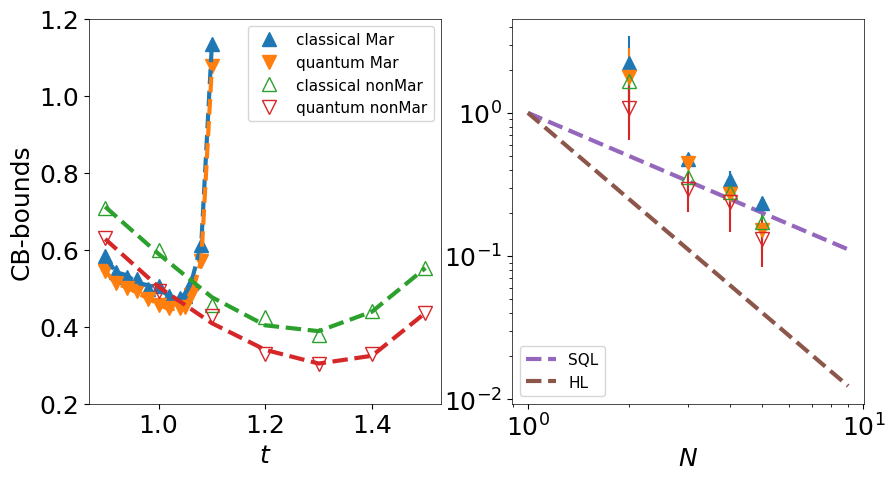

In [325]:
from scipy.optimize import curve_fit

# Define the model function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

markersizes = 10
linewidth = 3

# Plot the data on each subplot
axs[0].plot(noise,cls,'C0^',label='classical Mar',markersize=markersizes)
axs[0].plot(noise,sld, 'C1v',label='quantum Mar',markersize=markersizes)
axs[0].plot(noise3,cls3, 'C2^',markerfacecolor='none',label='classical nonMar',markersize=markersizes)
axs[0].plot(noise3,sld3, 'C3v',markerfacecolor='none',label='quantum nonMar',markersize=markersizes)

# Fit a nnd degree polynomial to the data
x_data = np.array(noise)
cls_data = np.array(cls)
sld_data = np.array(sld)

x3_data = np.array(noise3)
cls3_data = np.array(cls3)
sld3_data = np.array(sld3)

p_cls = np.polyfit(x_data, cls_data, 8)
cls_fit = np.polyval(p_cls, x_data)
p_sld = np.polyfit(x_data, sld_data, 8)
sld_fit = np.polyval(p_sld, x_data)

p_cls3 = np.polyfit(x3_data, cls3_data, 4)
cls3_fit = np.polyval(p_cls3, x3_data)
p_sld3 = np.polyfit(x3_data, sld3_data, 4)
sld3_fit = np.polyval(p_sld3, x3_data)

axs[0].plot(x_data, cls_fit,'C0--',linewidth=linewidth)
axs[0].plot(x_data, sld_fit, 'C1--',linewidth=linewidth)
axs[0].plot(x3_data, cls3_fit, 'C2--',linewidth=linewidth)
axs[0].plot(x3_data, sld3_fit, 'C3--',linewidth=linewidth)

# set up plot
axs[0].set_ylim(0.2, 1.2)
plt.xticks(np.arange(0.90,1.6,0.1))
plt.yticks(np.arange(0.0,1.4,0.2))
axs[0].legend(loc='upper right',fontsize=11)

axs[0].tick_params(axis='both', labelsize=18)
axs[0].set_xlabel('$t$', fontsize=18)
axs[0].set_ylabel('CB-bounds', fontsize=18)

# Plot the data 2
#axs[1].loglog(n,clsM, '^',label='')
#axs[1].loglog(n,sldM, 'v',label='')
#axs[1].loglog(n,clsnM, '^',markerfacecolor='none',label='')
#axs[1].loglog(n,sldnM, 'v',markerfacecolor='none',label='')

axs[1].errorbar(n, clsM, yerr=clsM_std, fmt='^',markersize=markersizes)
axs[1].errorbar(n, sldM, yerr=sldM_std, fmt='v',markersize=markersizes)
axs[1].errorbar(n, clsnM, yerr=clsnM_std, fmt='^',markerfacecolor='none',markersize=markersizes)
axs[1].errorbar(n, sldnM, yerr=sldnM_std, fmt='v',markerfacecolor='none',markersize=markersizes)

# Set the x and y scales to log
plt.xscale('log')
plt.yscale('log')

# SQL and HL
x = list(range(1,10,1))
sql = [1 / i for i in x]
hl = [1 / i**2 for i in x]

axs[1].loglog(x,sql, '--',label='SQL',linewidth=linewidth)
axs[1].loglog(x,hl, '--',label='HL',linewidth=linewidth)
axs[1].legend(loc='lower left',fontsize=11)

axs[1].set_xlabel('$N$', fontsize=18)
axs[1].tick_params(axis='both', labelsize=18)
mpl.rcParams['axes.linewidth'] = 0.5

# Display the plot
plt.savefig('fig_Mar_nonMar_star.eps')
plt.show()

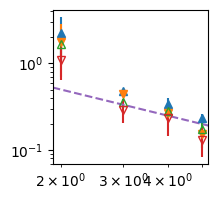

In [237]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
plt.errorbar(n, clsM, yerr=clsM_std, fmt='^')
plt.errorbar(n, sldM, yerr=sldM_std, fmt='v')
plt.errorbar(n, clsnM, yerr=clsnM_std, fmt='^',markerfacecolor='none')
plt.errorbar(n, sldnM, yerr=sldnM_std, fmt='v',markerfacecolor='none')
plt.loglog(x,sql, '--')
#plt.loglog(x,hl, '--')

# Set the x and y scales to log
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.9,5.2,1)
plt.savefig('fig_Mar_nonMar_star_subplot.eps')